Heart Disease Prediction
(Kaggle Dataset)

We will be working on a kaggle dataset (https://www.kaggle.com/code/andls555/heart-disease-prediction/data) with data on the presence of HeartDisease based on 18 variables. We will be performing the following on this data:



* **Exploratory Data Analysis**
* **Data Preprocessing**
    *   Missing Value Analysis
    *   Outlier Analysis
    *   Feature Selection
    *   Encoding
    *   Standardization
    *   Test Train Split
    *   Class Balancing
*   **Model Development**
    *   Logistic Regression
    *   SVM
    *   Random Forest
    *   Decision Tree
    *   GradientBoostingClassifier
    *   AdaBoostClassifier


##Importing all the modules

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV


##Importing the data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/project-heart/heart_2020_cleaned.csv'
data = pd.read_csv(filepath, sep=',')
print(data.shape)
print("Cols:",data.columns,"\nshape:",data.shape)

(319795, 18)
Cols: Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object') 
shape: (319795, 18)


##Exploring the data

In [ ]:
data_copy=data.copy()
data.head() 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Here is the distribution of all the features. 

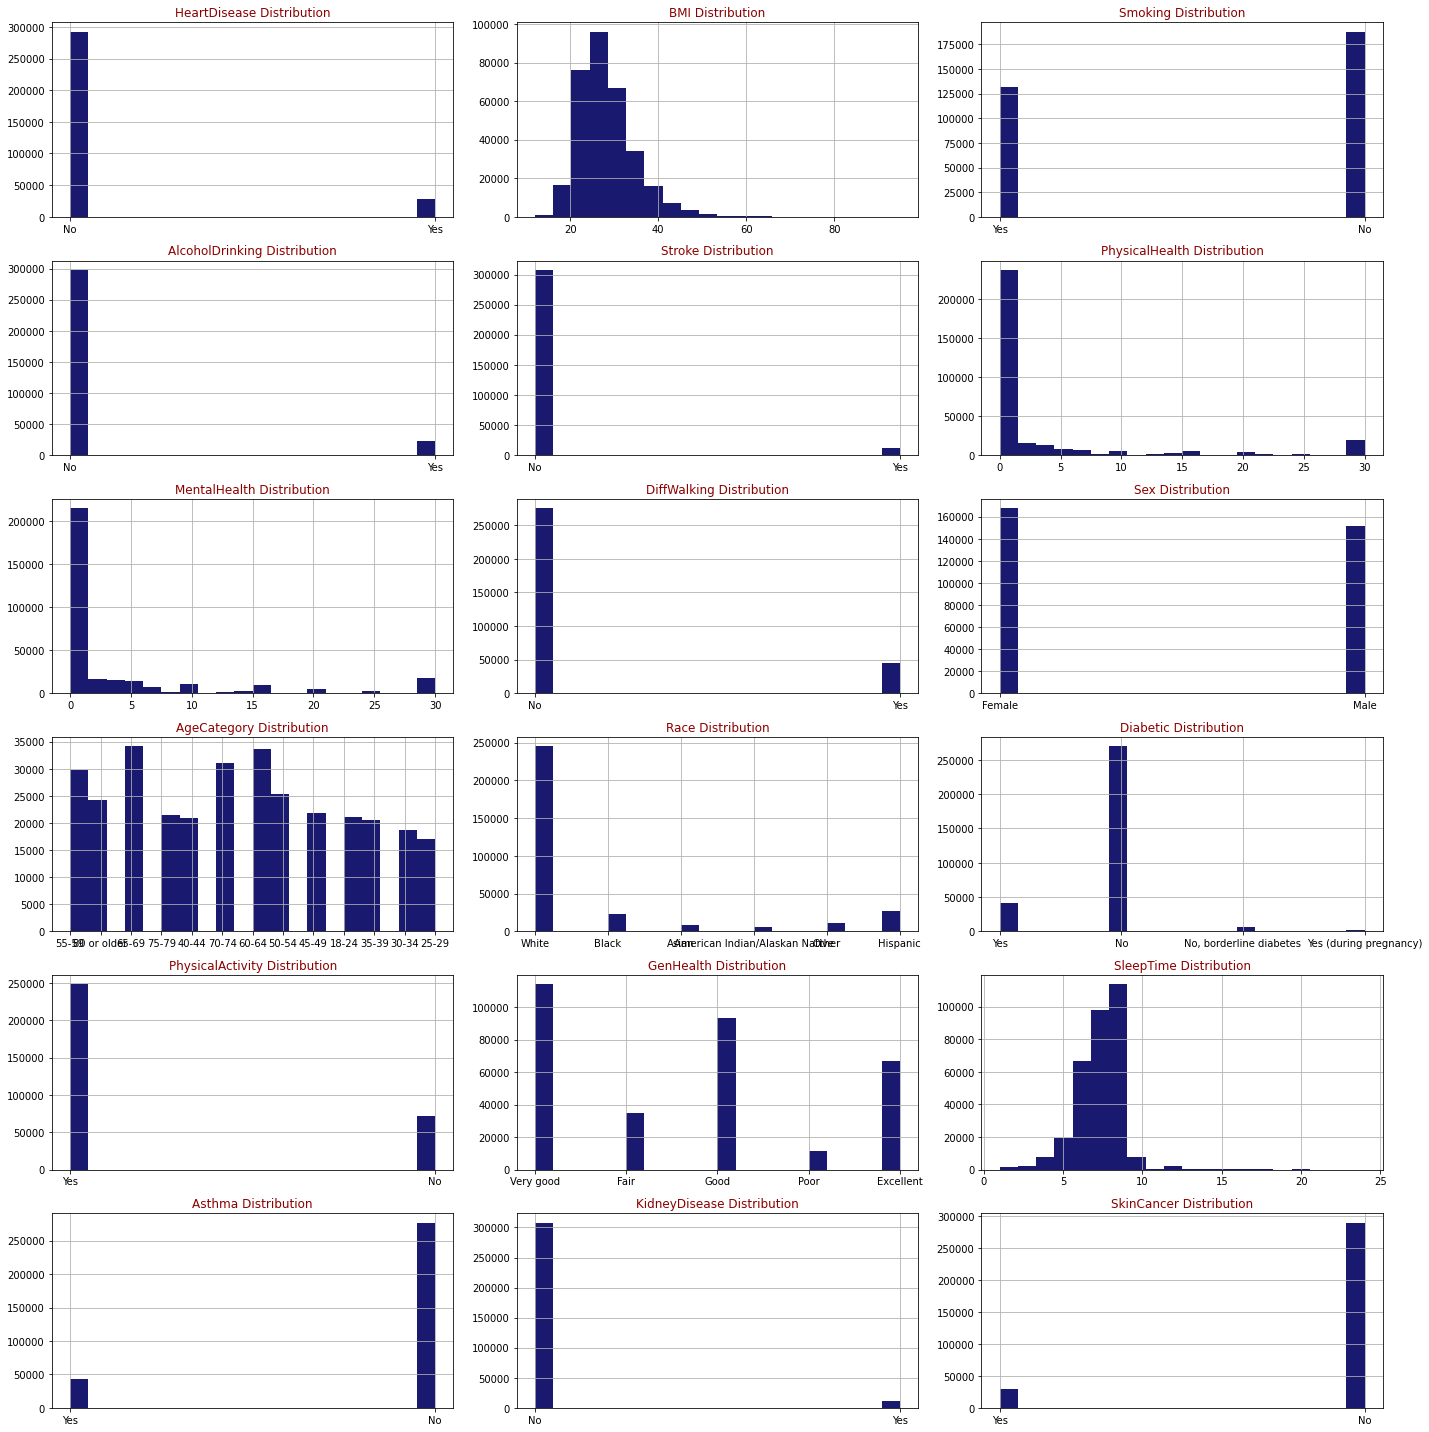

In [ ]:

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,6,3)

With this graph, we can see the relationship between the boolean columns and the target. We can see that men get sick more than women, and that smokers get sick more than smokers. 
And people who has ever had a stroke has a very high chance of getting sick, etc...
We wil try with this project to see if our attributes allow us to predict if a personn will be sick or not knowing these features. 

# Exploring continuous variables

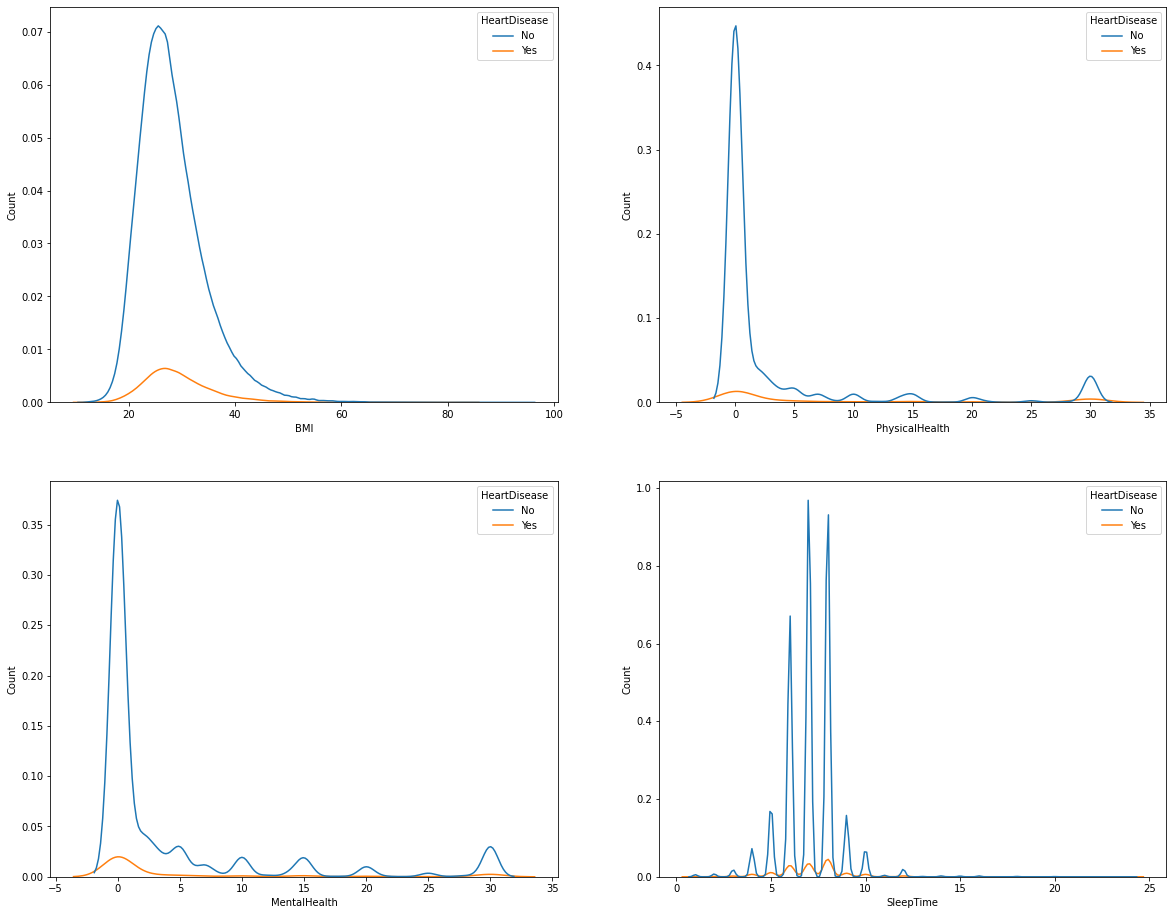

In [ ]:
float64_vars = data.select_dtypes('float64').columns
i=1
plt.figure(figsize = (20,16))
for col in float64_vars:
    plt.subplot(2,2,i)
    sns.kdeplot(x=col,hue='HeartDisease',data=data)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

BMI and SleepTime have close to a normal distribution whereas the same can not be seen in PhysicalHealth and MentalHealth

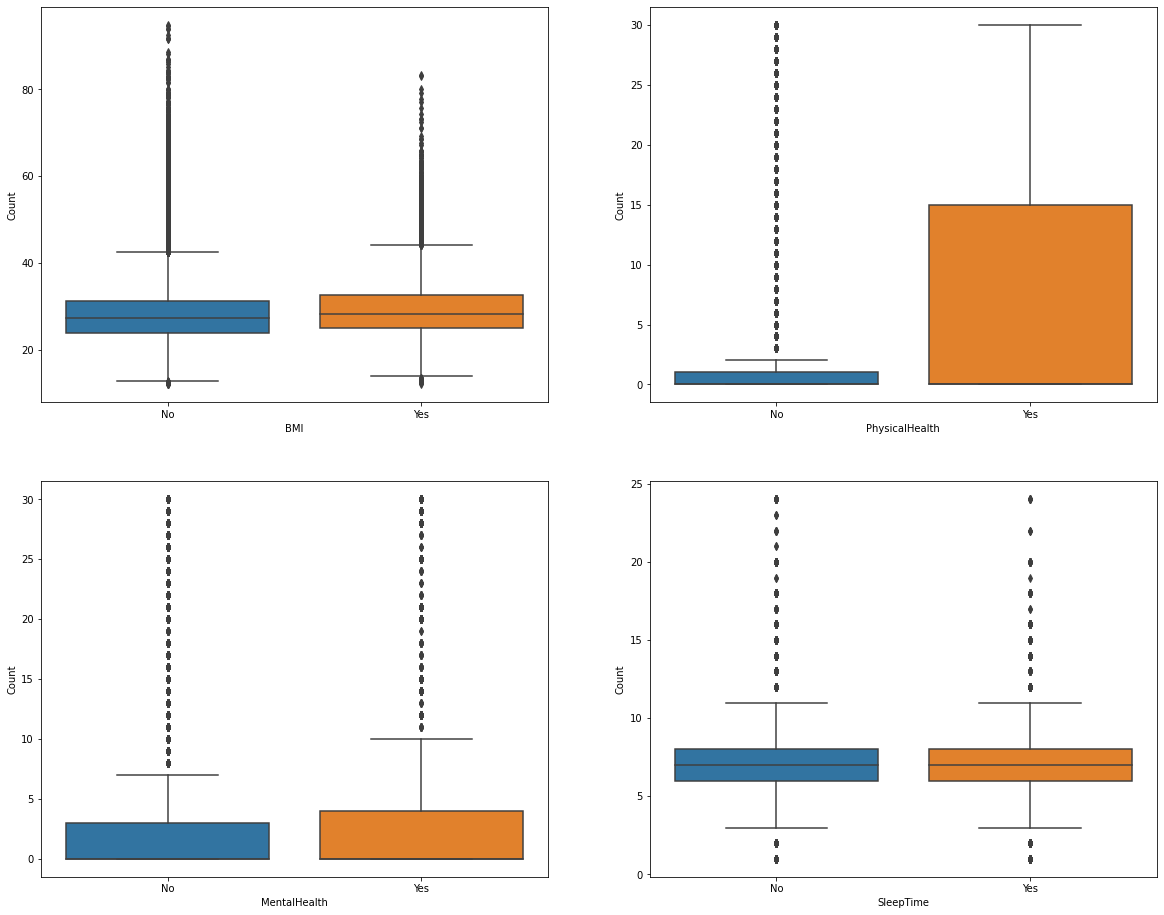

In [ ]:
i=1
plt.figure(figsize = (20,16))
for col in float64_vars:
    plt.subplot(2,2,i)
    sns.boxplot(y=col, x='HeartDisease', data=data)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

# Exploring categorical variables

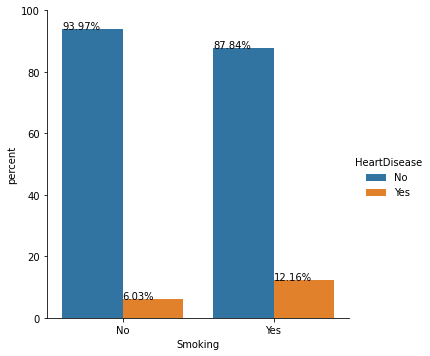

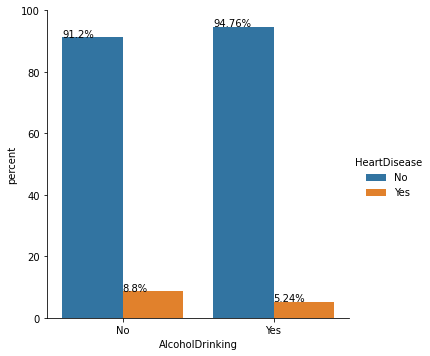

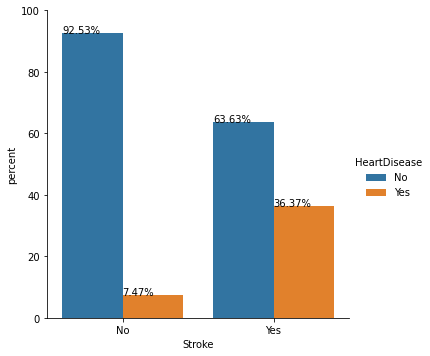

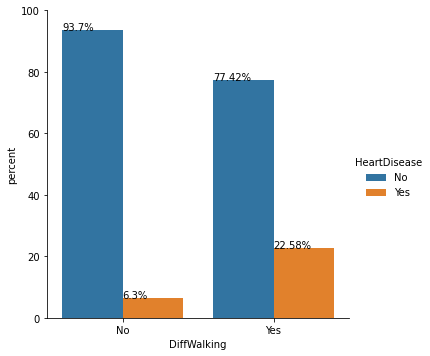

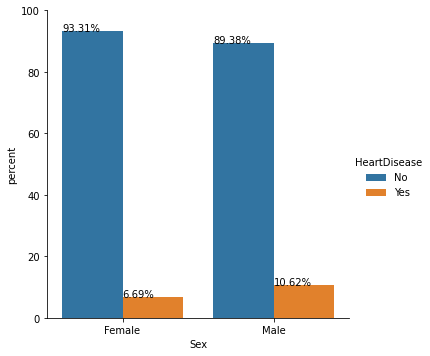

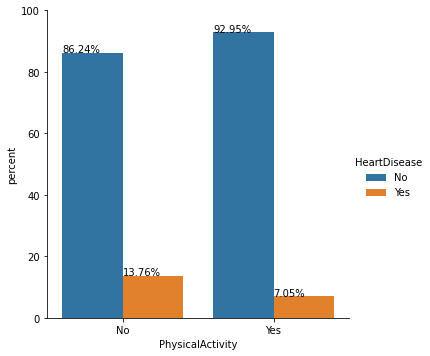

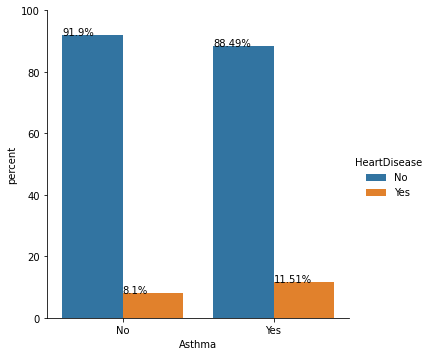

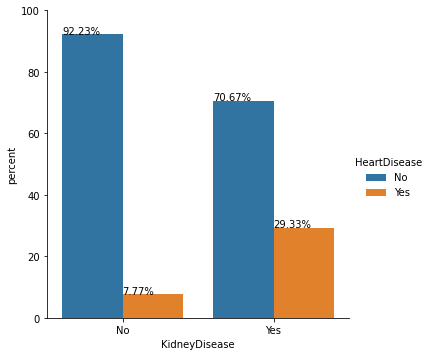

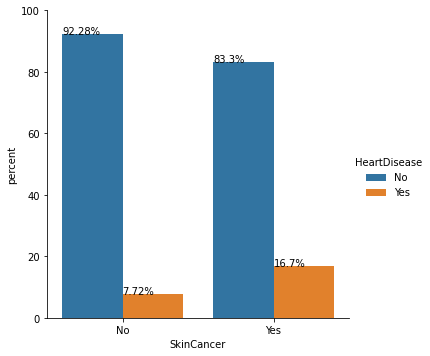

In [ ]:
cols = ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex',  'PhysicalActivity',  'Asthma', 'KidneyDisease', 'SkinCancer']
       
#n_rows = 3
#n_cols = 3

#for r in range(0,n_rows):
#   for c in range(0,n_cols): 
#     i = r*n_cols+ c  
for i in range(0,9):
      x,y = cols[i], 'HeartDisease'

      df1 = data.groupby(x)[y].value_counts(normalize=True)
      df1 = df1.mul(100)
      df1 = df1.rename('percent').reset_index()

      g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)#, aspect=.8,ax=ax[i]
      g.ax.set_ylim(0,100)
      for p in g.ax.patches:
          txt = str(p.get_height().round(2)) + '%'
          txt_x = p.get_x() 
          txt_y = p.get_height()
          g.ax.text(txt_x,txt_y,txt)
    


*   Smoking habits contributes to heart disease
*   On the other hand, the data shows that alcoholic drinking habits does not contribute to heart disease, which is quite counter-intuitive.
*   Stroke contributes to heart disease.
*   People with difficulty walking tend to have a higher chance of getting heart disease.
*   In terms of sexes, males tend to have a higher chance of heart disease than females.
*   General health good reduces the chance of getting heart disease.
*  Asthma, kidney disease, skin cancer and diabetes contribute to heart disease.
 However, asthma only gives a small contribution.



In [ ]:
heart_disease_race =data.groupby(['Race'])['HeartDisease'].value_counts(normalize=True)
heart_disease_race = pd.DataFrame(heart_disease_race)
heart_disease_race.columns=['%']

heart_disease_race
heart_disease_race=heart_disease_race.reset_index()
heart_disease_race = heart_disease_race[heart_disease_race['HeartDisease']=='Yes']
heart_disease_race['%']=heart_disease_race['%']*100
heart_disease_race

,Race,HeartDisease,%
1,American Indian/Alaskan Native,Yes,10.419070
3,Asian,Yes,3.296976
5,Black,Yes,7.537382
7,Hispanic,Yes,5.257597
9,Other,Yes,8.107613
11,White,Yes,9.178588


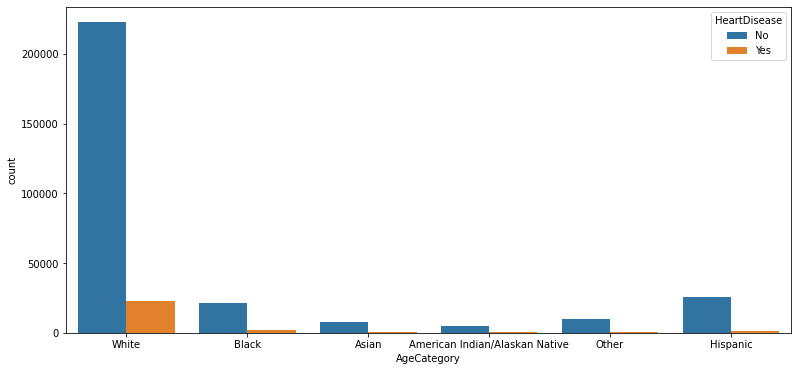

In [ ]:

plt.figure(figsize = (13,6))
sns.countplot(x = data['Race'], hue = 'HeartDisease', data = data )
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('count')
plt.show()

We study more accurately the relation between the column AgeCategory to HeartDisease. 

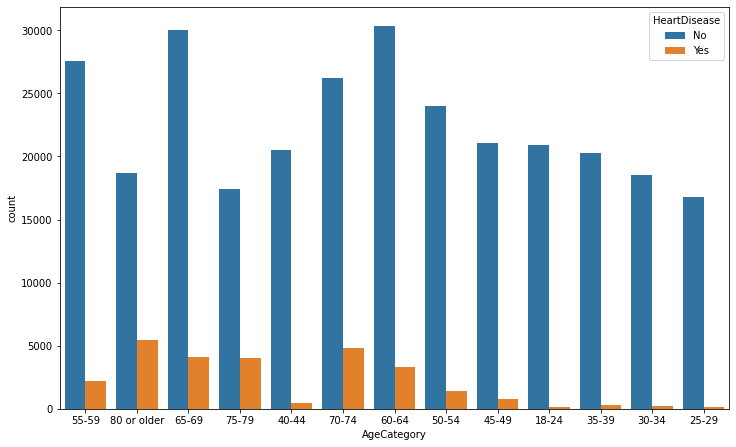

In [ ]:
plt.figure(figsize=(12,7.4))
sns.countplot(x='AgeCategory',hue= 'HeartDisease',data=data)

Following a graph of an age column, we wanted to check if the number of sick people increase with the age. 

We see that there is a range so we will use label encoder (explained in the following) to tranform the categorical values to numerical values.

In [ ]:
data.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
dict_age={'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5,'45-49':6, '50-54':7, '55-59':8,'60-64':9, '65-69':10, '70-74':11, '75-79':12 ,'80 or older':13  }
data['AgeCategory']=data.AgeCategory.map(dict_age) 

You see that as age increases, the chance of getting sick increases, but there is a drop at age 70

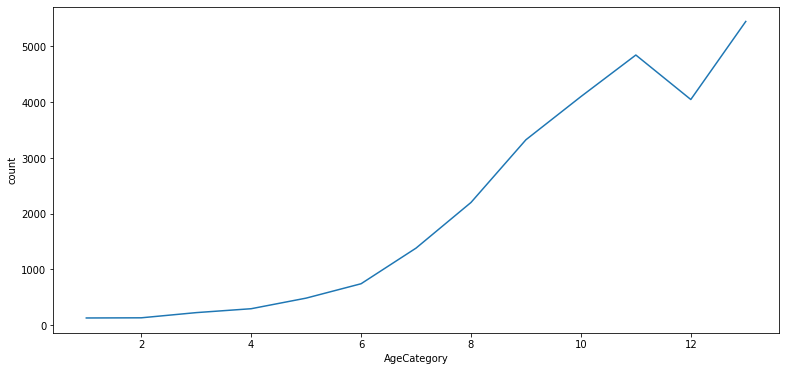

In [ ]:
heart_disease_age = data[data['HeartDisease']=='Yes'].groupby(['AgeCategory'])['HeartDisease'].count().reset_index()
plt.figure(figsize = (13,6))
data[data.HeartDisease=='Yes']
data_agg=data.KidneyDisease
sns.lineplot(x='AgeCategory', y='HeartDisease',  data=heart_disease_age)
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('count')
plt.show()

We have added a graph that shows the data in percentages to see more precisely if there is a continuous increase. A moderate increase in morbidity can be seen as age increases. 

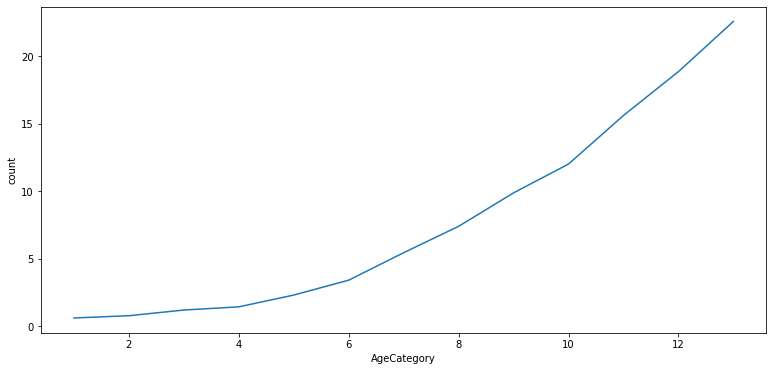

In [ ]:
  
heart_disease_age_precent =data.groupby(['AgeCategory'])['HeartDisease'].value_counts(normalize=True)
heart_disease_age_precent = pd.DataFrame(heart_disease_age_precent)
heart_disease_age_precent.columns=['%']
heart_disease_age_precent=heart_disease_age_precent.reset_index()
heart_disease_age_precent = heart_disease_age_precent[heart_disease_age_precent['HeartDisease']=='Yes']
heart_disease_age_precent['%']=heart_disease_age_precent['%']*100

plt.figure(figsize = (13,6))
data[data.HeartDisease=='Yes']
data_agg=data.KidneyDisease
sns.lineplot(x='AgeCategory', y='%',  data=heart_disease_age_precent)
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('count')
plt.show()



In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.514536,7.097075
std,6.356100,7.95085,7.955235,3.564759,1.436007
min,12.020000,0.00000,0.000000,1.000000,1.000000
25%,24.030000,0.00000,0.000000,5.000000,6.000000
50%,27.340000,0.00000,0.000000,8.000000,7.000000
75%,31.420000,2.00000,3.000000,10.000000,8.000000
max,94.850000,30.00000,30.000000,13.000000,24.000000


we can see that all the attributs have only non-null values, so we do not need to clean them by dropping the null values. 



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Outlier Analysis

Continuous data has presence of outliers, must be dealt with in preprocessing

In [ ]:
float64_vars = data.select_dtypes('float64').columns
from scipy.stats import zscore
z0 = data[float64_vars].apply(zscore)
z0.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05
mean,7.247738e-16,5.814632e-17,-4.332645e-17,1.727170e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.565319e+00,-4.240698e-01,-4.900386e-01,-4.245859e+00
25%,-6.757926e-01,-4.240698e-01,-4.900386e-01,-7.639770e-01
50%,-1.550322e-01,-4.240698e-01,-4.900386e-01,-6.760053e-02
75%,4.868719e-01,-1.725240e-01,-1.129278e-01,6.287760e-01
max,1.046628e+01,3.349118e+00,3.281069e+00,1.177080e+01


The function describe the minimum and find the maximum and maximum values of the standard deviation for each column. It is customary to consider values that exceed 3 standard deviations as outliers. We will remove from the establishment the examples that contain exceptions:

In [ ]:
num_cols = data.select_dtypes(exclude='object').columns
zs = data.copy()
for col in num_cols:
  zs[col] = zscore(zs[col])
outscores = np.abs(zs[num_cols])
no_outliers = (outscores<=3.3).all(axis=1)
data = data[no_outliers].reset_index(drop=True)


In [ ]:
data.shape

(294402, 18)

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


##Transforming the data

The OneHotEncoder and LabelEncoder are two used data transformers for processing categorical variables (i.e., variables that are not numeric). Here's how these two transformers differ from each other:

* The OneHotEncoder is used to transform categorical variables into binary variables. It creates one column for each possible category and indicates the presence or absence of each category in each data example using binary values (0 or 1). For example, if a variable has three possible categories (A, B, and C), the OneHotEncoder will create three binary columns for this variable.

* The LabelEncoder is used to transform categorical variables into numeric variables. It assigns a unique numeric value to each category of the variable. For example, if a variable has three possible categories (A, B, and C), the LabelEncoder will assign the values 0, 1, and 2 to these categories respectively.

 In general, the OneHotEncoder is recommended when we are using algorithms that are sensitive to the order of the variables (such as neural networks and decision trees), while the LabelEncoder is recommended when we are using algorithms that are not sensitive to the order of the variables (such as K-nearest neighbors and logistic regression).

We study the values of all the objects to decide wich encoder to aplly

There is not range, so we will work with one hot encoder for Race attribute

In [ ]:
data.Race.unique()

array(['White', 'Other', 'Black', 'Hispanic',
       'American Indian/Alaskan Native', 'Asian'], dtype=object)

We also notice that there is not range so we will one hot encode this column

In [ ]:
data.Diabetic.unique()

array(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'],
      dtype=object)

Here we have a range so we will label encode this column

In [ ]:
data.GenHealth.unique()

array(['Poor', 'Very good', 'Excellent', 'Good', 'Fair'], dtype=object)

we can see that all the attributs have only non-null values, so we do not need to clean them by dropping the null values


In [ ]:
num_ohc_cols = data.select_dtypes(include="object").nunique().sort_values(ascending=False)
num_ohc_cols

Race                6
GenHealth           5
Diabetic            4
HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
PhysicalActivity    2
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

Using the OneHotEncoder can impact the number of columns in our model depending on the number of categories in the categorical variable we are using. The OneHotEncoder creates one column for each possible category in the variable and uses binary values (0 or 1) to indicate the presence or absence of each category in each data example.

If we have a categorical variable with a large number of categories, this can result in a very large number of columns in our model, which can affect the complexity of the model and the computational speed. It can also make it difficult to interpret the results of the model, as each column in the model represents a category of the categorical variable.

That is why we are counting our new number of columns, to know if it affects our model. The result is that our new number of columns is not so different from the preview number, so it would not significantly affect our model.

In [ ]:
num_ohc_cols.sum()

35

 

We will use a one-hot encoder rather than a label encoder before calculating correlations. This is because a one-hot encoder creates a separate binary column for each category in the categorical variable, which allows the correlations between the categorical variable and other variables to be more accurately captured.

On the other hand, a label encoder assigns a unique numerical value to each category in the categorical variable, which can be problematic when calculating correlations. This is because the numerical values assigned by a label encoder do not have a meaningful order, and so the correlations calculated between a categorical variable encoded with a label encoder and other variables may not accurately reflect the true relationships between the variables.

But, when we use a one-hot encoder to transform the categorical variable into numerical form, it will create separate binary columns, one for each category sp when calculating correlations, the relationships between these binary columns and other variables will be more accurately reflected, since the values of the binary columns have a meaningful order.

Therefore, we use a one-hot encoder rather than a label encoder when working with categorical variables and calculating correlations. This will ensure that the correlations accurately reflect the relationships between the variables and provide more reliable insights into the data.


In [ ]:

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

dat = le.fit_transform(data["GenHealth"]).astype(int)
data['GenHealth'] = dat


data['Sex'] = data['Sex'].replace('Female',1).replace('Male',0).astype('int')

for col in ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']:#bit_col.index:
     data[col] = data[col].replace('No',0).replace('Yes',1).astype('int')
data_corr=data.copy()
for col in ["Race","Diabetic"]:

    # Integer encode the string categories
    dat = le.fit_transform(data[col]).astype(int)
    # Remove the original column from the dataframe
    data = data.drop(col, axis=1)
  
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]


    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data.index, 
                          columns=col_names)


    # Append the new data to the dataframe
    data = pd.concat([data, new_df], axis=1)

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3
0,0,16.60,1,0,0,3.0,30.0,0,1,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,1,13,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,0,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,1,12,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#Feature Selection

##Correlation between the features

You can see a relatively high compatibility between the columns PhysicalActivity to diffWalking one indicates lack of physical activity and the other indicates physical activity

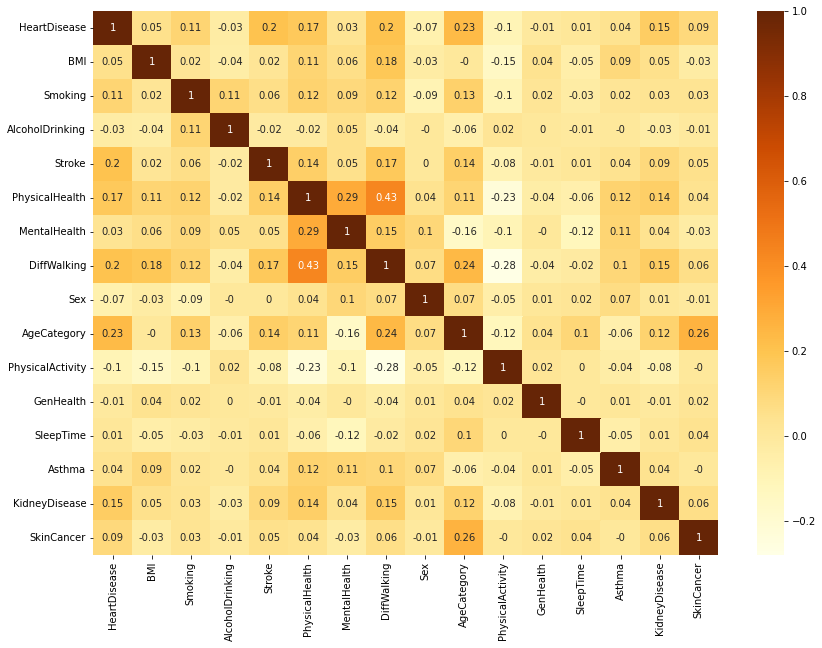

In [ ]:
correlation = data_corr.corr().round(2)
plt.figure(figsize = (14,10))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [ ]:

# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

#correlations=data[feature_cols].corrwith(data['HeartDisease'])
# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

#correlations=abs(correlations)
corr_values

,feature1,feature2,correlation,abs_correlation
0,HeartDisease,BMI,0.051803,0.051803
1,HeartDisease,Smoking,0.107764,0.107764
2,HeartDisease,AlcoholDrinking,-0.032080,0.032080
3,HeartDisease,Stroke,0.196835,0.196835
4,HeartDisease,PhysicalHealth,0.170721,0.170721
...,...,...,...,...
295,Race_5,Diabetic_1,-0.035494,0.035494
296,Race_5,Diabetic_2,-0.040584,0.040584
297,Diabetic_0,Diabetic_1,-0.341324,0.341324
298,Diabetic_0,Diabetic_2,-0.886841,0.886841


Thanks to this graph we can see that we don't have columns with high correlations, we only see a few ones that have a correlation of 1 and we will study this case in the following.


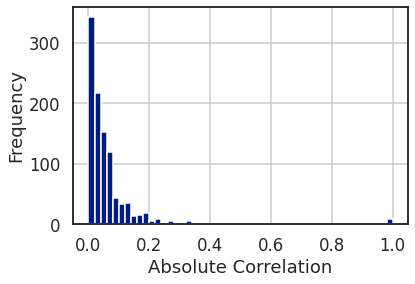

In [ ]:

%matplotlib inline
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')
#ax=correlations.hist(bins=50)
ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

The highly correlated columns are thus wich come from the same original column that was one-hot encoded. 

We will keep both of the columns in our dataset because both columns can still provide useful information to our model, and dropping either of them may result in the loss of important information for predicting the target value.
In fact, if two of the columns created by one-hot encoding are highly correlated, it may indicate that the categories in the original column are strongly related to each other. 


In [ ]:
#correlations > 0.8
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
298,Diabetic_0,Diabetic_2,-0.886841,0.886841


Before transforming the categorical values in numerical values, we could not describe the object column. Now, after doing the label encoder and the one-hot encoder we can study all the columns. 


In [ ]:

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'HeartDisease'}
data.groupby('HeartDisease').agg(agg_dict)

BMI        PhysicalHealth        MentalHealth         \
                   mean median           mean median         mean median   
HeartDisease                                                               
0             28.224658  27.26       2.956416    0.0     3.828778    0.0   
1             29.401592  28.34       7.808242    0.0     4.641764    0.0   

             GenHealth        SleepTime         ...  Asthma_1         \
                  mean median      mean median  ...      mean median   
HeartDisease                                    ...                    
0             2.226098    2.0  7.093416    7.0  ...  0.129741    0.0   
1             2.165418    2.0  7.136156    7.0  ...  0.180214    0.0   

             KidneyDisease_0        KidneyDisease_1        SkinCancer_0  \
                        mean median            mean median         mean   
HeartDisease                                                              
0                   0.971534    1.0        0.028466    0.0     0.915058   
1                   0.873781    1.0        0.126219    0.0     0.818069   

                    SkinCancer_1         
             median         mean median  
HeartDisease                             
0               1.0     0.084942    0.0  
1               1.0     0.181931    0.0  

[2 rows x 92 columns]

##High variance

We drop features with high variance because high variance can indicate that a feature is not very useful for predicting the target value.

Features with high variance often have a large range of values, which can make it difficult for a machine learning model to accurately predict the target value based on the feature. This is because the model may be sensitive to small changes in the feature values, leading to unstable or inconsistent predictions.

Additionally, features with high variance can dominate the model's predictions and make it difficult for the model to consider the contributions of other features. This can lead to overfitting, where the model is trained too closely to the training data and is not able to generalize well to new, unseen data.

Therefore, dropping features with high variance can help improve the performance of our model by reducing the impact of unstable or dominant features and improving the model's ability to generalize to new data. 

Moreover, we decided to do normalization before using VarianceThreshold because other wise the variance estimates can be misleading between higher value features and lower value features.

We choose thresfold=0.7 * (1 - 0.7), and we finally don't drop any columns because there variance is lower.


In [ ]:
#threshold with .7
sel = VarianceThreshold(threshold=(.7 * (1 - .7)))
data2 = pd.concat([X_train,X_test],axis=0)
print(" the number of columns before is:", data2.shape)
data_new = pd.DataFrame(sel.fit_transform(data2))
print(" the number of columns after is:", data_new.shape)


#X_train,X_test = train_test_split(data_new)
##y_train_new,y_test_new = train_test_split(data_y)
print(X_train.shape,X_test.shape)

 the number of columns before is: (134261, 25)
 the number of columns after is: (134261, 25)
(38322, 25) (95939, 25)


#Standardization
Scaling is a preprocessing step that is commonly used in machine learning to adjust the range and distribution of features in a dataset.

The choice of scale depends on our data and our model. Here are some things to desribe a scaler:
* StandardScaler: This tool normalizes data by centering and scaling it. It calculates the mean and standard deviation of each data column and performs the normalization by subtracting the mean and dividing by the standard deviation. StandardScaler is often used when the columns have similar standard deviations.

* MinMaxScaler: This tool normalizes data by scaling it to a specified range. It calculates the minimum and maximum of each data column and performs the normalization by dividing each value by the maximum and subtracting the minimum. MinMaxScaler is often used when the data has a very wide range of values and we want to limit the influence of outliers on the model.

* MaxAbsScaler: This tool normalizes data by scaling it to a specified range, while preserving the sign of each value. It calculates the maximum absolute value of each data column and performs the normalization by dividing each value by the maximum absolute value. MaxAbsScaler is often used when the data has a very wide range of values and we want to preserve the sign of each value.

NB: scalers should be applied consistently when training and predicting with the model. If we use a scaler when training, we should also use it when predicting to ensure that the data is preprocessed consistently.


In [ ]:

scalers = {'standard': StandardScaler(),
          'minmax': MinMaxScaler(),
          'maxabs': MaxAbsScaler()}

from sklearn.model_selection import train_test_split

feature_cols_scaling = [x for x in data.columns if x != 'HeartDisease']
X_train_scaling, X_test_scaling, y_train_scaling, y_test_scaling = train_test_split(data[feature_cols_scaling], data['HeartDisease'], test_size=0.33, random_state=42)
# initialize model
##LR = LinearRegression()

LR = LogisticRegressionCV(penalty='l2',solver='sag',Cs=5, cv=2)
# iterate over all possible combinations and get the errors
errors = {}

for scaler_label, scaler in scalers.items():
    trainingset = X_train_scaling.copy()  # copy because we dont want to scale this more than once.
    #trainingset = X_train.copy()  # copy because we dont want to scale this more than once.
    testset = X_test_scaling.copy()
    trainingset = scaler.fit_transform(trainingset)
    testset = scaler.transform(testset)
    LR.fit(trainingset, y_train_scaling)
    #LR.fit(trainingset, y_train)
    predictions = LR.predict(testset)
    key = scaler_label + 'scaling'
    #errors[key] = classification_report(y_test, predictions)
    errors[key] =  mean_squared_error(y_test_scaling, predictions)
    
errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
   print(key, error_val)

 

standardscaling    0.085433
minmaxscaling      0.086163
maxabsscaling      0.086191
--------------------------------------------------------------------------------
standardscaling 0.08543299252366558
minmaxscaling 0.0861626221182
maxabsscaling 0.08619104924525978


#Test Train Split

In [ ]:
#from sklearn.model_selection import train_test_split

#training_data, testing_data = train_test_split(data, test_size=0.2)

y_col = 'HeartDisease'
feature_cols = [x for x in data.columns if x != y_col]

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.HeartDisease))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'HeartDisease']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'HeartDisease']

Finally, we choose the StandartScaling because it gives the smallest error. 

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
y_train=y_train.copy()
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3
0,-0.768254,1.194039,-0.269626,-0.197024,-0.424410,-0.365854,-0.401504,0.951185,0.698450,0.538411,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,0.431341,-0.146205,-0.383065,-0.089680
1,-0.820216,-0.837494,-0.269626,-0.197024,-0.424410,-0.491208,-0.401504,-1.051321,0.417799,-1.857316,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,0.431341,-0.146205,-0.383065,-0.089680
2,1.132294,-0.837494,-0.269626,-0.197024,-0.173098,-0.365854,-0.401504,0.951185,1.259751,0.538411,...,-0.128044,-0.160942,3.592228,-0.306276,-0.187364,-1.814468,0.431341,-0.146205,-0.383065,-0.089680
3,-1.028064,-0.837494,-0.269626,-0.197024,-0.424410,-0.491208,-0.401504,0.951185,-0.143502,0.538411,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,-2.318352,-0.146205,-0.383065,11.150754
4,3.034416,1.194039,-0.269626,-0.197024,3.345265,2.015858,2.490636,-1.051321,-0.424153,0.538411,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,0.431341,-0.146205,-0.383065,-0.089680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223851,0.392230,1.194039,-0.269626,5.075532,-0.424410,-0.491208,-0.401504,-1.051321,0.698450,0.538411,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,0.431341,-0.146205,-0.383065,-0.089680
223852,0.493004,1.194039,-0.269626,-0.197024,0.078213,-0.491208,2.490636,0.951185,1.259751,-1.857316,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,-2.318352,-0.146205,2.610524,-0.089680
223853,-1.484699,-0.837494,-0.269626,-0.197024,-0.424410,-0.491208,-0.401504,0.951185,-0.985454,0.538411,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,0.431341,-0.146205,-0.383065,-0.089680
223854,-0.519466,-0.837494,-0.269626,-0.197024,-0.424410,-0.491208,-0.401504,-1.051321,1.540401,0.538411,...,-0.128044,-0.160942,-0.278379,-0.306276,-0.187364,0.551126,-2.318352,-0.146205,2.610524,-0.089680


##UnderSampling the Data

When wee check the proporion of our target variables, we found that our data is imbalanced because the proportion of people sick is much more important than not sick.

This can be a problem in our model because the algorithms that we will use are designed to optimize overall accuracy, and are therefore biased towards the majority class. As a result, they may have difficulty in accurately predicting the minority class, leading to poor performance on imbalanced datasets and high error rates for the minority class.

The solution is to use an algorithm that are specifically designed to handle imbalanced data.


In [ ]:
data.HeartDisease.value_counts(normalize=True).sort_index()
##y_train.value_counts(normalize=True).sort_index()

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

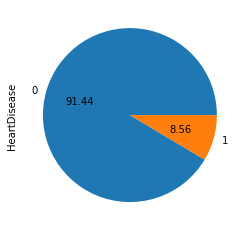

In [ ]:
data.HeartDisease.value_counts().plot.pie(autopct='%.2f')

There are severall algorithms that are specifically designed to handle imbalanced data in Python. 

For our project we choose to use RandomUnderSampler to undersample the majority class rather than oversampling the minority class because it does not require synthesizing new instances and then increase the computational efficiency. 
It can also help to reduce the amount of noise in the dataset, as it removes some of the instances in the majority class that may not be relevant to the prediction task and that may increase the running time of our models.


We apply the Undersampling after splitting into training and test, not before. Doing SMOTE before is bogus and defeats the purpose of having a separate test set.

At a really crude level, SMOTE essentially duplicates some samples (this is a simplification, but it will give you a reasonable intuition). If you duplicate every sample ten times, and then split into train and test, then about 5 copies of each sample will appear in the training set and about 5 copies in the test set. Effectively, the test set becomes more or less identical to the training set. A classifier that just memorizes the training set (and overfits to it massively) will also do very well on the test set -- but it would perform terribly in practice.'''

In [ ]:


undersampler = RandomUnderSampler(sampling_strategy="majority")

X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
##print(X_train_undersampled.shape)

data_under_sampling = pd.concat([X_train_undersampled,y_train_undersampled],axis=1)
print("the new shape is:",data_under_sampling.shape)
y_train_undersampled.value_counts(normalize=True).sort_index()

the new shape is: (38322, 26)


0    0.5
1    0.5
Name: HeartDisease, dtype: float64

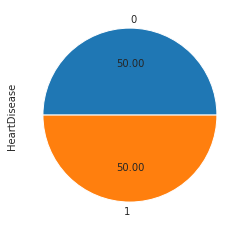

In [ ]:
y_train_undersampled.value_counts().plot.pie(autopct='%.2f')

#**Model Development**

*   Logistic Regression
*   SVM
*   Random Forest
*   Decision Tree
*  GradientBoostingClassifier
---




In [ ]:
X_train_list = [X_train, X_train_undersampled]
y_train_list = [y_train, y_train_undersampled]
data_desc = ['Imbalanced', 'Random Under-sampling']

In [ ]:
data_fit_model_basic=[]
data_fit_model_weight=[]
data_fit_model_balance=[]
data_desc_model=['Logistic Regression','SVM','Random Forest','Decision Tree','GradientBoostingClassifier','AdaBoostClassifier']


##Evaluating the models

In [ ]:

def evaluate_model(model, x_test, y_test):
   

    fpr, tpr=0,0
    # Predict Test Data 
    y_pred = model.predict(x_test)
    if model.__class__.__name__ != 'SVC':
        
    # Calculate area under curve (AUC)
        y_pred_proba = model.predict_proba(x_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    cr = classification_report(y_test, y_pred)

    accuracy= accuracy_score(y_test, y_pred)
    recall= recall_score(y_test, y_pred)
    precision= precision_score(y_test,y_pred)
   
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    #disp.plot()
    return {'cm': cm, 'cr': cr, 'display_labels':model.classes_,'fpr': fpr, 'tpr': tpr, 'accuracy':accuracy,'recall': recall,'precision': precision}

##Logistic regression

Logistic regression is used for predicting binary outcomes . It is a type of generalized linear model that uses a logistic function to model the probability of the outcome being a certain value. The model is trained using a set of input features and a binary outcome. The goal of training is to find the best set of weights for the input features such that the model can accurately predict the outcome for new, unseen data. 

We will use logistic regression cross validation 

We will use grid search to determinate the hyperparametres

The 'newton-cg', 'lbfgs', 'sag', 'saga', and 'liblinear' solvers are different algorithms for training logistic regression models.

* The 'newton-cg' solver is a variant of the Newton's method that uses a conjugate gradient algorithm to find the optimal coefficients for the model. It is generally faster than the 'lbfgs' solver, but may not be as robust on certain types of data.

* The 'lbfgs' solver is a limited-memory variant of the Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm, which is a quasi-Newton method that approximates the Hessian matrix of the objective function. It is generally faster than the 'newton-cg' solver for small datasets, but may be slower for larger datasets. 

* The 'sag' (Stochastic Average Gradient) solver is an optimization algorithm that combines the benefits of both the 'newton-cg' and 'lbfgs' solvers, using a variance-reduced gradient descent method. It is generally faster than both 'newton-cg' and 'lbfgs', but may require more memory.

* The 'saga' solver is similar to the 'sag' solver, but uses a variance-reduced coordinate descent method instead of gradient descent. It is generally faster than the 'sag' solver, but may require more memory.

* The 'liblinear' solver is a linear solver based on the coordinate descent algorithm. It is generally faster than the 'newton-cg', 'lbfgs', 'sag', and 'saga' solvers for large datasets, but may not be as accurate for smaller datasets.

In general, the 'saga' solver is the fastest, followed by 'sag', 'newton-cg', 'lbfgs', and 'liblinear'.
We had first tried all the solver but the algorithm take so much time that finally we decided to choose only between 'saga','sag' and 'liblinear' that are the 3 fasters solvers.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

param_grid = {'penalty': ['l2'],'solver':['sag','saga','liblinear','newton-cg', 'lbfgs']}

GR = GridSearchCV(LogisticRegressionCV(Cs=5, cv=2),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1,error_score='raise',cv=3)

GR = GR.fit(X_train, y_train)

print(GR)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",GR.best_estimator_)
print("\n The best score across ALL searched params:\n",GR.best_score_)
print("\n The best parameters across ALL searched params:\n",GR.best_params_)

GridSearchCV(cv=3, error_score='raise',
             estimator=LogisticRegressionCV(Cs=5, cv=2), n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['sag', 'saga', 'liblinear', 'newton-cg',
                                    'lbfgs']},
             scoring='accuracy')
 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegressionCV(Cs=5, cv=2, solver='saga')

 The best score across ALL searched params:
 0.7510829288659254

 The best parameters across ALL searched params:
 {'penalty': 'l2', 'solver': 'saga'}


We try to see if the score are better with L1 regularization. 
We see that the score is lower than what we found before. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

param_grid = {'penalty': ['l1'],'solver':['saga','liblinear']}

GR = GridSearchCV(LogisticRegressionCV(Cs=5, cv=2),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1,error_score='raise',cv=3)

GR = GR.fit(X_train, y_train)

print(GR)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",GR.best_estimator_)
print("\n The best score across ALL searched params:\n",GR.best_score_)
print("\n The best parameters across ALL searched params:\n",GR.best_params_)

GridSearchCV(cv=3, error_score='raise',
             estimator=LogisticRegressionCV(Cs=5, cv=2), n_jobs=-1,
             param_grid={'penalty': ['l1'], 'solver': ['saga', 'liblinear']},
             scoring='accuracy')
 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegressionCV(Cs=5, cv=2, penalty='l1', solver='liblinear')

 The best score across ALL searched params:
 0.7507958874797765

 The best parameters across ALL searched params:
 {'penalty': 'l1', 'solver': 'liblinear'}


Thanks to the previous grid search we know that the best parametrs are penalty='l1' and solver='sag' so we will run only the following code since we know that it is the best parametr. In fact, it takes so much time to run the previous code.

In [ ]:
LR_basic = LogisticRegressionCV(penalty='l2' ,solver='liblinear',Cs=5, cv=2)
LR_basic = LR_basic.fit(X_train, y_train)

LR_weight = LogisticRegressionCV(penalty='l2' ,solver='liblinear',Cs=5, cv=2,class_weight='balanced')
LR_weight = LR_weight.fit(X_train, y_train)

LR = LogisticRegressionCV(penalty='l2' ,solver='liblinear',Cs=5, cv=2)
LR = LR.fit(X_train_undersampled, y_train_undersampled)

evaluate_model_LR=evaluate_model(LR, X_test, y_test)
print(evaluate_model_LR['cr'])

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87727
           1       0.21      0.76      0.34      8212

    accuracy                           0.74     95939
   macro avg       0.59      0.75      0.59     95939
weighted avg       0.91      0.74      0.80     95939



In [ ]:
data_fit_model_basic.insert(0,LR_basic)
data_fit_model_weight.insert(0,LR_weight)
data_fit_model_balance.insert(0,LR)

##Support Vector Machine
Support Vector Classification finds the best boundary (or "hyperplane") that separates the different classes in the training data. Once this boundary is found, new data can be classified based on which side of the boundary it falls on.

The algorithm takes a long of time. 
Thanks to this first grid search, we see that a smaller gamma=0.1 give a better result. For the next code, we wil run the same cell with a smaller gamma=0.01 to win time and a big C=100.  

In [ ]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [1,10],
              'gamma': [0.1,1] , 
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.739 total time= 2.0min
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.739 total time= 2.1min
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.668 total time= 2.8min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.667 total time= 2.7min
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.713 total time= 2.6min
[CV 2/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.714 total time= 2.6min
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.661 total time= 3.2min
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.653 total time= 3.1min
 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, gamma=0.1)

 The best score across ALL searched params:
 0.7390793799906059

 The best parameters across ALL searched params:
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In fact, we can see that gamma=0.01 give us a better result. In the next cell we will try with C=0.01 and gamma=0.001.

In [ ]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [1,100],
              'gamma': [0.01] , 
              'kernel': ['rbf']} 
  
gri = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
  
# fitting the model for grid search
gri.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gri.best_estimator_)
print("\n The best score across ALL searched params:\n",gri.best_score_)
print("\n The best parameters across ALL searched params:\n",gri.best_params_)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.751 total time= 1.2min
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.754 total time=  55.0s
[CV 1/2] END .....C=100, gamma=0.01, kernel=rbf;, score=0.732 total time= 2.7min
[CV 2/2] END .....C=100, gamma=0.01, kernel=rbf;, score=0.735 total time= 3.3min
 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, gamma=0.01)

 The best score across ALL searched params:
 0.7526747038254789

 The best parameters across ALL searched params:
 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


Finally, we can see that the score dosen't increase so our final parametrs will be: gamma=0.01 ans C=1 with a score of 0.7526747038254789.

In [ ]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [1,0.1],
              'gamma': [0.001] , 
              'kernel': ['rbf']} 
  
gr = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
  
# fitting the model for grid search
gr.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gr.best_estimator_)
print("\n The best score across ALL searched params:\n",gr.best_score_)
print("\n The best parameters across ALL searched params:\n",gr.best_params_)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.754 total time= 1.0min
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.752 total time= 1.0min
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.749 total time= 1.0min
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.744 total time= 1.0min
 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, gamma=0.001)

 The best score across ALL searched params:
 0.7525703251396065

 The best parameters across ALL searched params:
 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


Thanks to the previous grid search we know that the best parametrs are gamma=0.01 and c=1 so we will run only this cell to win time.

In [ ]:
from sklearn.svm import SVC


SVM_basic = SVC(gamma=0.01,C=1,kernel='rbf')
SVM_basic=SVM_basic.fit(X_train, y_train)

SVM_weight = SVC(gamma=0.01,C=1,kernel='rbf',class_weight='balanced')
SVM_weight=SVM_weight.fit(X_train, y_train)


In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma=0.01,C=1,kernel='rbf')
SVM=SVM.fit(X_train_undersampled, y_train_undersampled)
evaluate_model_SVM = evaluate_model(SVM, X_test, y_test)
print(evaluate_model_SVM['cr'])

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87727
           1       0.21      0.80      0.33      8212

    accuracy                           0.72     95939
   macro avg       0.59      0.76      0.58     95939
weighted avg       0.91      0.72      0.78     95939



In [ ]:
data_fit_model_basic.insert(1,SVM)
data_fit_model_weight.insert(1,SVM)
data_fit_model_balance.insert(1,SVM)

## RandomForestClassifier

For the next, we will use RandomForestClassifier.
We will use the oob score wich is a measure of the accuracy of the Random Forest model calculated using the out-of-bag samples, which are the samples that are not used to train the individual decision trees in the forest.
It is considered to be a more reliable estimate of the model's performance than the training accuracy, since it is less prone to overfitting.
The more the oob score is small, the more the model is good. 

In [ ]:


# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.287302
20.0,0.279787
30.0,0.273159
40.0,0.267888
50.0,0.265696
100.0,0.260555
150.0,0.258442
200.0,0.257398
300.0,0.257581


Thanks to this graph we see that the oob error stabilizes as the depth tree grows. The best depth is 200.

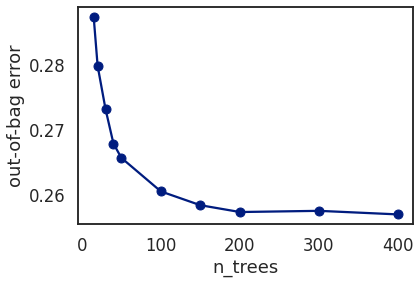

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

We tried to choose the best tree depth of the RandomForestclassifier by using this time the GridSearchCV. We obtain that the best depth tree is 200 wich is the same result as using the loop, so we can use both.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Initialize the random forest estimator
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

param={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]}
grid = GridSearchCV(RF, param, refit = True, verbose = 3, cv=2)
  
# fitting the model for grid search
grid.fit(X_train, y_train)   


Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/2] END ...................n_estimators=15;, score=0.902 total time=  10.3s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/2] END ...................n_estimators=15;, score=0.902 total time=   7.7s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/2] END ...................n_estimators=20;, score=0.904 total time=   8.0s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/2] END ...................n_estimators=20;, score=0.905 total time=   5.0s
[CV 1/2] END ...................n_estimators=30;, score=0.904 total time=   7.4s
[CV 2/2] END ...................n_estimators=30;, score=0.905 total time=   7.3s
[CV 1/2] END ...................n_estimators=40;, score=0.905 total time=   9.7s
[CV 2/2] END ...................n_estimators=40;, score=0.905 total time=   9.8s
[CV 1/2] END ...................n_estimators=50;, score=0.905 total time=  11.9s
[CV 2/2] END ...................n_estimators=50;, score=0.905 total time=  12.0s
[CV 1/2] END ..................n_estimators=100;, score=0.905 total time=  23.0s
[CV 2/2] END ..................n_estimators=100;, score=0.905 total time=  26.2s
[CV 1/2] END ..................n_estimators=150;, score=0.905 total time=  40.2s
[CV 2/2] END ..................n_estimators=150;, score=0.905 total time=  36.9s
[CV 1/2] END ..................n_estimators=200;, score=0.905 total time=  46.9s
[CV 2/2] END ...............

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]},
             verbose=3)

In [ ]:

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42, warm_start=True)

 The best score across ALL searched params:
 0.9053185976699307

 The best parameters across ALL searched params:
 {'n_estimators': 200}


As before we will just run the model with the best parametr that we found in the gread search to win time. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_basic = RandomForestClassifier(oob_score=True,  random_state=42,   warm_start=True, n_estimators=200,  n_jobs=-1)
RF_basic.fit(X_train, y_train)

RF_weight = RandomForestClassifier(oob_score=True,  random_state=42,   warm_start=True, n_estimators=200,  n_jobs=-1,class_weight='balanced')
RF_weight.fit(X_train, y_train)

RF = RandomForestClassifier(oob_score=True,  random_state=42,   warm_start=True, n_estimators=200,  n_jobs=-1)
RF.fit(X_train_undersampled, y_train_undersampled)


evaluate_model_RF = evaluate_model(RF, X_test, y_test)
print(evaluate_model_RF['cr'])

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:765: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87727
           1       0.20      0.77      0.32      8212

    accuracy                           0.72     95939
   macro avg       0.59      0.74      0.57     95939
weighted avg       0.91      0.72      0.78     95939



In [ ]:
data_fit_model_basic.insert(2,RF_basic)
data_fit_model_weight.insert(2,RF_weight)
data_fit_model_balance.insert(2,RF)

With the RandomForestClassifier we can see in the graphic bellow that the most important features are: BMI, SleepTime, GenHealth, PhysicalHealth and MentalHealth. 

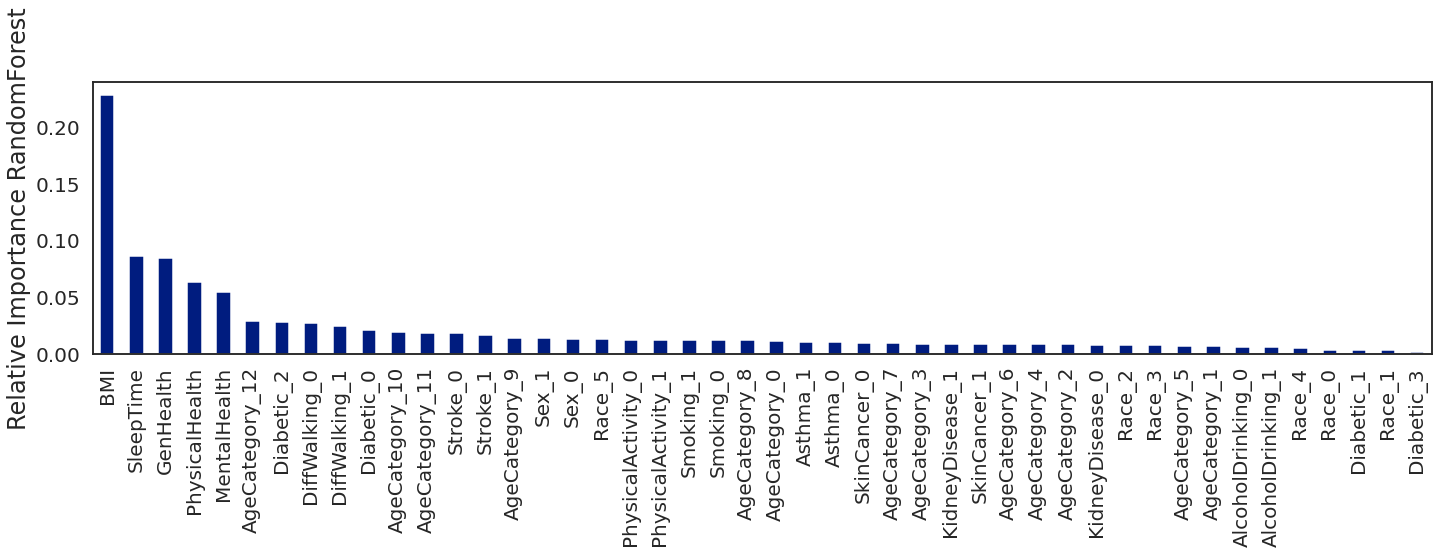

In [ ]:
feature_imp = pd.Series(RF.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
params = {'figure.figsize': (24,5),
          'font.size': 20,
          'axes.titlesize':'xx-large',
          'axes.labelsize': 'large',    
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium'}
plt.rcParams.update(params)

ax.set(ylabel='Relative Importance RandomForest');



## ExtraTreesClassifier

Since using the loop or gridSearchCv give use the same results, we will use the loop because it is faster.

The Extra Trees classifier is a faster but less accurate variant of the Random Forest classifier. It uses random splits of the features to construct the decision trees, and typically uses a smaller number of decision trees than the Random Forest classifier. It does not use feature selection to improve the model's generalization like the RandomForest.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.291112
20.0,0.283362
30.0,0.274855
40.0,0.272846
50.0,0.269480
100.0,0.264365
150.0,0.263086
200.0,0.262434
300.0,0.261495


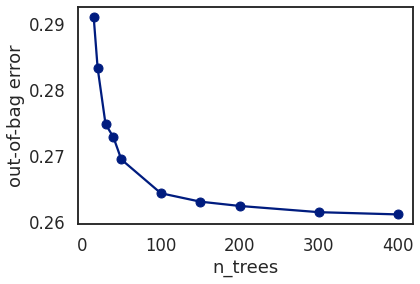

In [ ]:

%matplotlib inline
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = et_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
EF_basic = ExtraTreesClassifier(oob_score=True,  random_state=42, warm_start=True, bootstrap=True,   n_estimators=400, n_jobs=-1)
EF_basic.fit(X_train, y_train)

EF_weight = ExtraTreesClassifier(oob_score=True,  random_state=42, bootstrap=True,   n_estimators=400, n_jobs=-1,class_weight='balanced')
EF_weight.fit(X_train, y_train)



EF = ExtraTreesClassifier(oob_score=True,  random_state=42, warm_start=True, bootstrap=True,   n_estimators=400, n_jobs=-1)
EF.fit(X_train_undersampled, y_train_undersampled)


evaluate_model_EF = evaluate_model(EF, X_test, y_test)
print(evaluate_model_EF['cr'])

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87727
           1       0.20      0.77      0.32      8212

    accuracy                           0.72     95939
   macro avg       0.58      0.74      0.57     95939
weighted avg       0.90      0.72      0.78     95939



In [ ]:
data_fit_model_basic.insert(3,EF_basic)
data_fit_model_weight.insert(3,EF_weight)
data_fit_model_balance.insert(3,EF)

With the ExtraTreesClassifier we can see in the graphic bellow that the most important features are: BMI, SleepTime, GenHealth, PhysicalHealth and MentalHealth. 

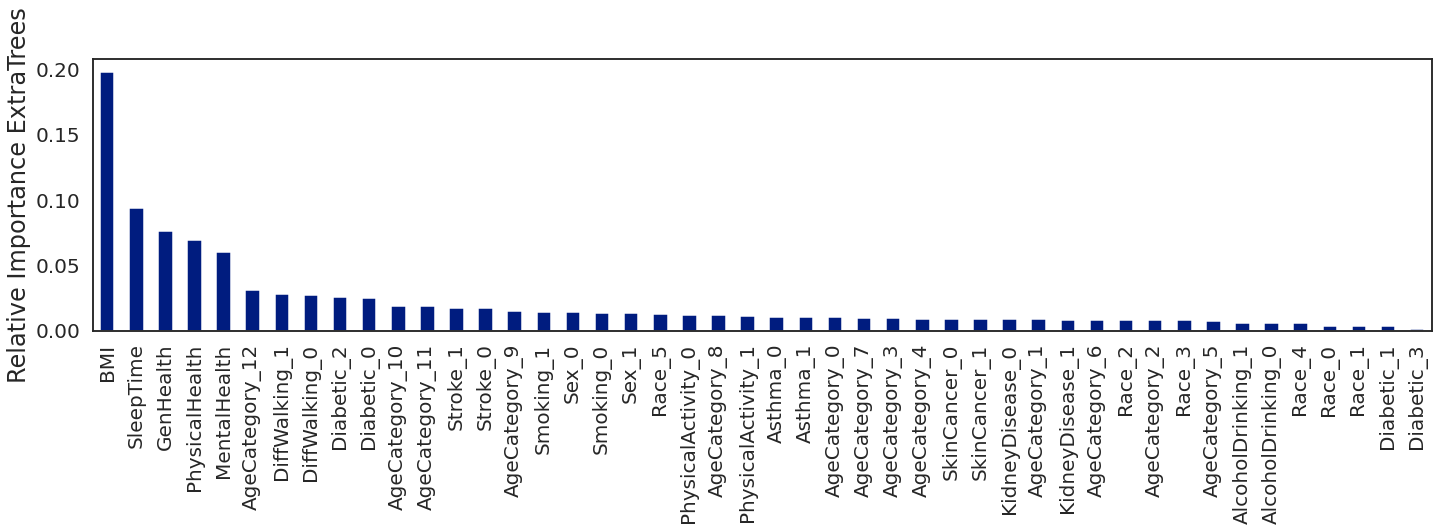

In [ ]:
feature_imp = pd.Series(EF.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
params = {'figure.figsize': (24, 5),
          'font.size': 20,
          'axes.titlesize':'xx-large',
          'axes.labelsize': 'large',    
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium'}
plt.rcParams.update(params)

ax.set(ylabel='Relative Importance ExtraTrees');



## GradientBoostingClassifier

The Gradient Boosting Classifier is a more accurate but slower set classification algorithm than the Random Forest Classifier. It uses the boosting method( training each decision tree in such a way as to minimize the error of the prediction on the training data set) to build the decision trees and generally uses a larger number of decision trees than the Random Forest Classifier. It does not use feature selection to improve model generalization. The Random Forest Classifier is a faster set-based classification algorithm that uses the traditional method of finding the best cut given a measure of purity to build decision trees and uses feature selection to improve model generalization.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through all of the possibilities for number of estimators
tree_list = [15, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, 
                                     subsample=0.5,
                                     max_features=4,
                                     
                                     random_state=42)

    # Fit the model
    GBC.fit(X_train, y_train)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1. - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

,error
n_trees,
15.0,0.085398
50.0,0.084210
100.0,0.083970
200.0,0.083855
400.0,0.083907


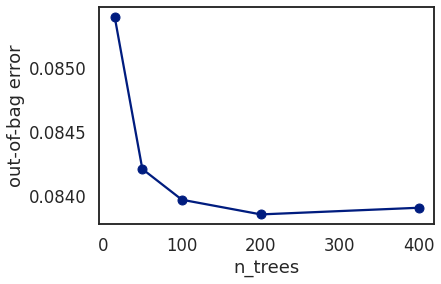

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = error_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

learning rate shrinks the contribution of each tree by learning_rate.

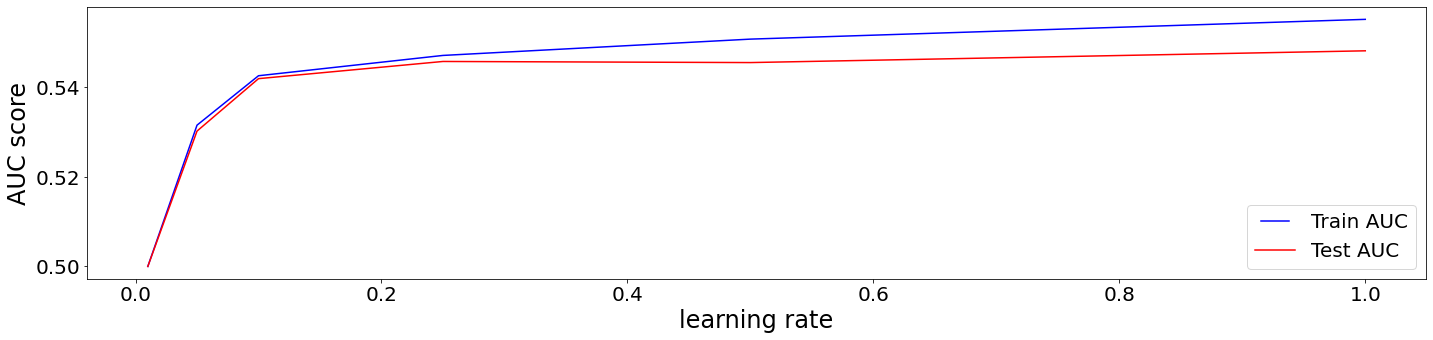

In [ ]:
from sklearn.metrics import roc_curve, auc
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

We see that using a high learning rate results in overfitting and in test data. For this data, a learning rate of 0.3 is optimal.

**n_estimators** represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

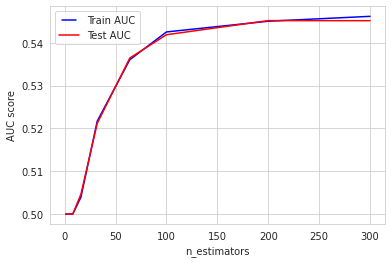

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,300]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Increasing the number of estimators may result in overfitting also. In our case, using 200 trees is optimal. You see a stabilization of the graph

**max_depth**. This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. We fit a decision tree with depths ranging from 1 to 15 and plot the training and test errors.

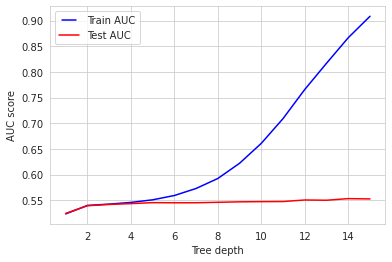

In [ ]:
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

**max_features** represents the number of features to consider when looking for the best split.

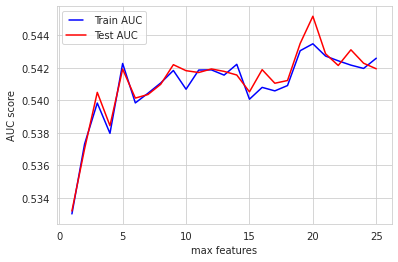

In [ ]:
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

Increasing max_features to consider all of the features results in an overfitting in this case. Using max_features = 6 seems to get us the optimal performance.

The model without parameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_basic= GradientBoostingClassifier(n_estimators=200,subsample=1)
GBC_basic.fit(X_train, y_train)

#GBC = GradientBoostingClassifier(n_estimators=200,  subsample=0.5,max_depths = 14, max_features=4, random_state=42)
#GBC.fit(X_train_undersampled, y_train_undersampled)

#data_desc_model=['Logistic Regression','SVM','Random Forest','Extra Trees Classifier' ,'GradientBoostingClassifier']

evaluate_model_GBC = evaluate_model(GBC_basic, X_test, y_test)
print(evaluate_model_GBC['cr'])

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.58      0.10      0.17      8212

    accuracy                           0.92     95939
   macro avg       0.75      0.55      0.56     95939
weighted avg       0.89      0.92      0.89     95939



In [ ]:
print(evaluate_model_GBC_param['cr'])

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     81707
           1       0.55      0.06      0.11      6614

    accuracy                           0.93     88321
   macro avg       0.74      0.53      0.54     88321
weighted avg       0.90      0.93      0.90     88321



The model with parameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_basic_param = GradientBoostingClassifier(n_estimators=200,learning_rate=0.3,max_depth=14,  subsample=1, max_features=20, random_state=42)
GBC_basic_param.fit(X_train, y_train)

#GBC = GradientBoostingClassifier(n_estimators=200,  subsample=0.5,max_depths = 14, max_features=4, random_state=42)
#GBC.fit(X_train_undersampled, y_train_undersampled)

#data_desc_model=['Logistic Regression','SVM','Random Forest','Extra Trees Classifier' ,'GradientBoostingClassifier']

evaluate_model_GBC_param = evaluate_model(GBC_basic_param, X_test, y_test)
print(evaluate_model_GBC['cr'])

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.58      0.10      0.17      8212

    accuracy                           0.92     95939
   macro avg       0.75      0.55      0.56     95939
weighted avg       0.89      0.92      0.89     95939



In [ ]:
data_fit_model_basic.insert(4,GBC_basic)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_basic = GradientBoostingClassifier(n_estimators=200,learning_rate=0.3,max_depth=14,  subsample=0.5, max_features=20, random_state=42)
GBC_basic.fit(X_train, y_train)
evaluate_model_GBC = evaluate_model(GBC_basic, X_test, y_test)
print(evaluate_model_GBC['cr'])


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.58      0.09      0.16      8212

    accuracy                           0.92     95939
   macro avg       0.75      0.54      0.56     95939
weighted avg       0.89      0.92      0.89     95939



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_basic = GradientBoostingClassifier(n_estimators=200,learning_rate=0.3,max_depth=14,  subsample=1, max_features=20, random_state=42)
GBC_basic.fit(X_train, y_train)
evaluate_model_GBC = evaluate_model(GBC_basic, X_test, y_test)
print(evaluate_model_GBC['cr'])

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     87727
           1       0.32      0.14      0.19      8212

    accuracy                           0.90     95939
   macro avg       0.62      0.56      0.57     95939
weighted avg       0.87      0.90      0.88     95939



In [ ]:
data_fit_model_basic.insert(4,GBC_basic)
data_fit_model_weight.insert(4, GBC_basic)
data_fit_model_balance.insert(4,GBC)

With the GradientBoostingClassifier we can see in the graphic bellow that the most important features are: BMI, SleepTime, GenHealth, PhysicalHealth and MentalHealth. 

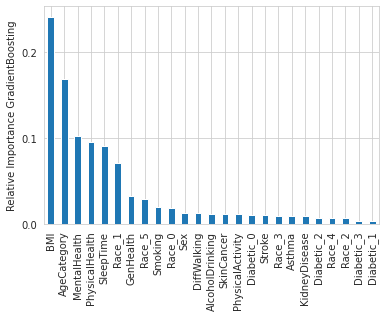

In [ ]:
feature_imp = pd.Series(GBC_basic.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
params = {'figure.figsize': (24, 5),
          'font.size': 20,
          'axes.titlesize':'xx-large',
          'axes.labelsize': 'large',    
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium'}
plt.rcParams.update(params)

ax.set(ylabel='Relative Importance GradientBoosting');



##Classification report
A classification report is the summary of the performance of the classification algorithm. The classification report includes the following metrics:
* Precision: the proportion of true positive predictions out of all positive predictions. It quantifies the ability of the classifier not to label as positive a sample that is negative.
* Recall: the proportion of true positive predictions out of all actual positive samples. It quantifies the ability of the classifier to find all the positive samples.
* F1-score: the harmonic mean of precision and recall. It is a balance between the precision and the recall.
* Support: the number of samples of the true response that lie in that class.



*   We can see that we reached the same result with the balance and with the weight in LogisticRegression
*   The other models worked better with the balance except for the GradientBoostingClassifier model which knows how to work with unbalanced data



In [ ]:
list_ev_basic=[]
list_ev_weight=[]
list_ev_balance=[]
for i in [0,2,3]:
  print(data_fit_model_basic[i])
  value = evaluate_model(data_fit_model_basic[i], X_test, y_test)
  list_ev_basic.insert(i,value)
  print(value['cr'])
  print('-------weight-------')
  value = evaluate_model(data_fit_model_weight[i], X_test, y_test)
  list_ev_weight.insert(i,value)
  print(value['cr'])
  print('--------balance--------')
  value = evaluate_model(data_fit_model_balance[i], X_test, y_test)
  list_ev_balance.insert(i,value)
  print(value['cr'])
print(data_fit_model_basic[1])
value = evaluate_model(data_fit_model_basic[1], X_test, y_test)
list_ev_balance.insert(1,value)
print(value['cr'])
print(data_fit_model_basic[4])
value = evaluate_model(data_fit_model_basic[4], X_test, y_test)
list_ev_basic.insert(4,value)
print(value['cr'])

LogisticRegressionCV(Cs=5, cv=2, solver='liblinear')
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.55      0.07      0.12      8212

    accuracy                           0.92     95939
   macro avg       0.74      0.53      0.54     95939
weighted avg       0.89      0.92      0.88     95939

-------weight-------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87727
           1       0.21      0.76      0.34      8212

    accuracy                           0.74     95939
   macro avg       0.59      0.75      0.59     95939
weighted avg       0.91      0.74      0.80     95939

--------balance--------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87727
           1       0.21      0.76      0.34      8212

    accuracy                           0.74     95939
   macro avg       0.59      0

##Comparison of models
We compare the accuracies of all the models i.e the proportion of correctly classified instances for each model.
We obtaine a good accuracy but it is not relevant since our data test is imbalanced. We apply the Undersampling only on the train and not the test data, so it is not relevant. That is why we will look on the recall and the precision that are more signifiant.

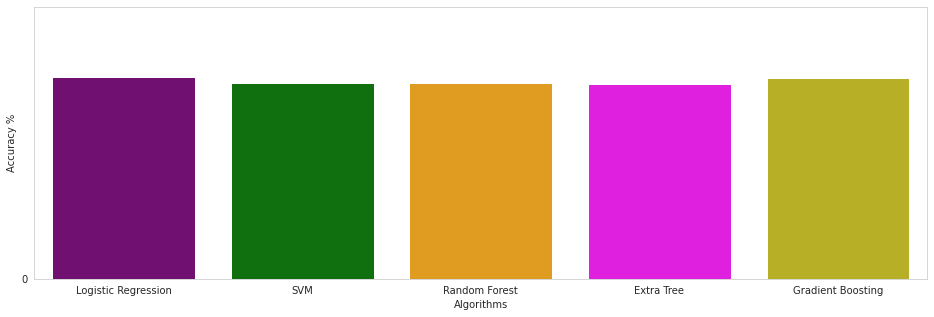

In [ ]:

methods = ["Logistic Regression", "SVM", "Random Forest", "Extra Tree", "Gradient Boosting"]
accuracy = [evaluate_model_LR['accuracy'], evaluate_model_SVM['accuracy'],evaluate_model_RF['accuracy'],evaluate_model_EF['accuracy'],evaluate_model_GBC['accuracy']]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.ylim(0,1)
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

We can see that we obtain a good result for the recall that is near to 75%. Knowing that Recall= TP/(TP+FN), if this model is going to be used by an hospital to know if a personn is sick, the recall is the most important since it can be fatal if we give a bad prediction.

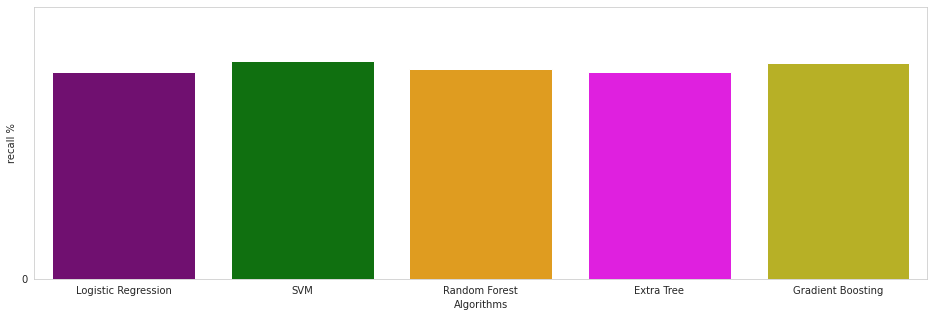

In [ ]:

methods = ["Logistic Regression", "SVM", "Random Forest", "Extra Tree", "Gradient Boosting"]
recall = [evaluate_model_LR['recall'], evaluate_model_SVM['recall'],evaluate_model_RF['recall'],evaluate_model_EF['recall'],evaluate_model_GBC['recall']]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("recall %")
plt.xlabel("Algorithms")
plt.ylim(0,1)
sns.barplot(x=methods, y=recall, palette=colors)
plt.show()

With this graphic we can see that the precision is very bad. Knowing that precision= TP/ (TP+FP), if the model is going to be used for commerce or economy, this model is very bad...

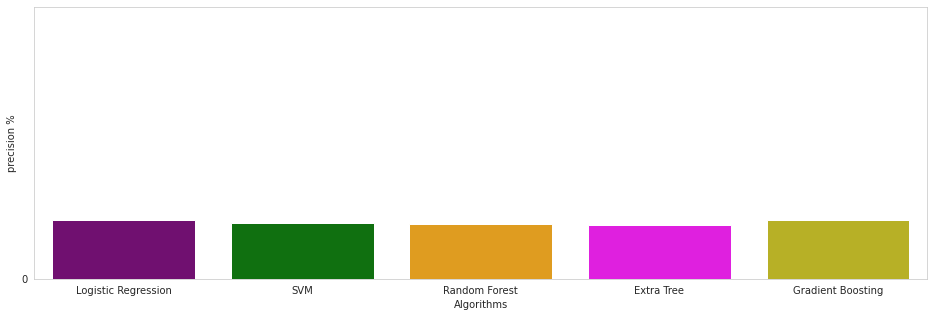

In [ ]:

methods = ["Logistic Regression", "SVM", "Random Forest", "Extra Tree", "Gradient Boosting"]
precision = [evaluate_model_LR['precision'], evaluate_model_SVM['precision'],evaluate_model_RF['precision'],evaluate_model_EF['precision'],evaluate_model_GBC['precision']]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("precision %")
plt.xlabel("Algorithms")
plt.ylim(0,1)
sns.barplot(x=methods, y=precision, palette=colors)
plt.show()

##Confusion matrix 
A confusion matrix is a table that is used to define the performance of a classification algorithm.
The confusion matrix has four quadrants: true positives TP, false positives FP, true negatives TN, and false negatives FN.
* TP are the cases in which the model predicted the positive class:yes.
* FP are the cases in which the model predicted the positive class:yes. 
* TN are the cases in which the model predicted the negative class:no.
* FN are the cases in which the model predicted the negative class:no.

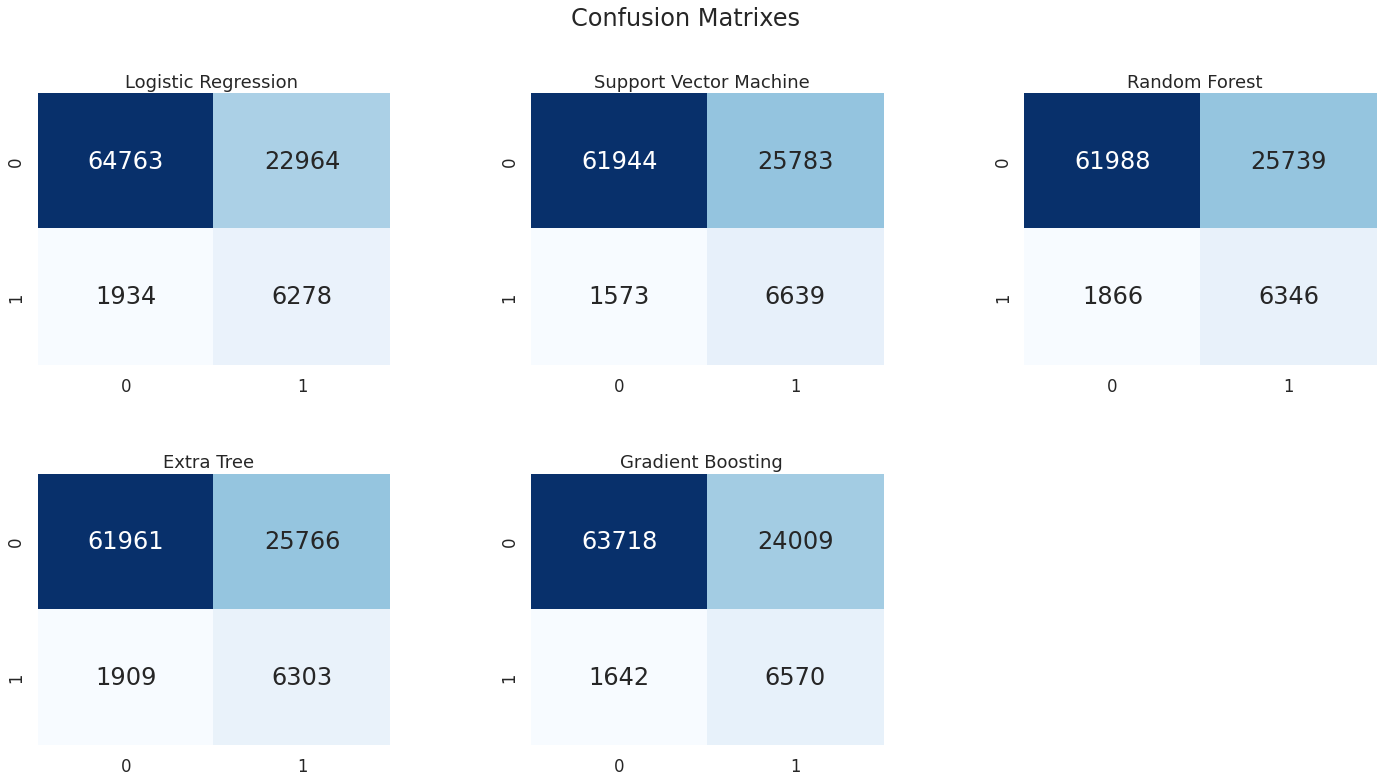

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm_lr = evaluate_model_LR['cm']
cm_svm = evaluate_model_SVM['cm']
cm_rf=evaluate_model_RF['cm']
cm_et=evaluate_model_EF['cm']
cm_gb=evaluate_model_GBC['cm']

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression ")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,2)
plt.title("Support Vector Machine  ")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,3)
plt.title("Random Forest  ")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Extra Tree  ")
sns.heatmap(cm_et,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Gradient Boosting  ")
sns.heatmap(cm_gb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()


##ROC curves
Receiver Operating Characteristic ROC curves are a way to visualize the performance of the algorithm. The ROC curve plots the true positive rate (sensitivity or recall) against the false positive rate as the classification threshold is varied.

The true positive rate is the proportion of positive samples that are correctly classified as such. The false positive rate is the proportion of negative samples that are incorrectly classified as positive.
A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in an ROC curve that hugs the top left corner of the plot.

For our models we can see that the curve approches the top left corner of the plot, so the models give a good prediction. 

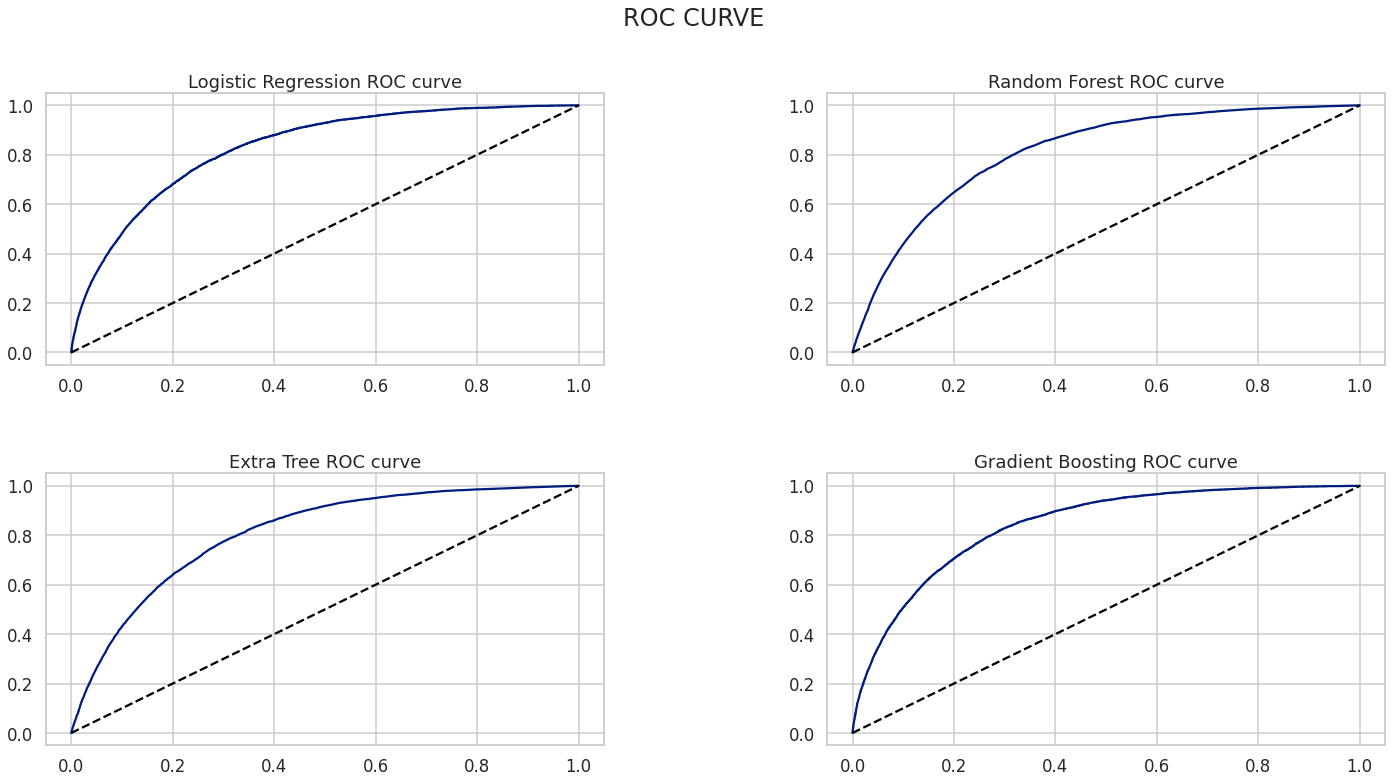

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr  =evaluate_model_LR['fpr']
tpr = evaluate_model_LR['tpr']
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(24,12))
plt.suptitle("ROC CURVE",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression ROC curve")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 

fpr_RF  =evaluate_model_RF['fpr']
tpr_RF = evaluate_model_RF['tpr']
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.subplot(2,2,2)
plt.title("Random Forest ROC curve")
plt.plot(fpr_RF, tpr_RF, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], 'k--') 

fpr  =evaluate_model_EF['fpr']
tpr = evaluate_model_EF['tpr']
roc_auc = auc(fpr, tpr)
plt.subplot(2,2,3)
plt.title("Extra Tree ROC curve")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 

fpr  =evaluate_model_GBC['fpr']
tpr = evaluate_model_GBC['tpr']
roc_auc = auc(fpr, tpr)
plt.subplot(2,2,4)
plt.title("Gradient Boosting ROC curve")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 

plt.show()


##Polynomial Features
Because our low precision, we try to improve our model by using Polynomial Features.It gives us 351 columns. We can see that the results are not particulary better knowing that the algorithms need much more time to run because the new big number of feature. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X1 = data_copy.drop('HeartDisease',axis=1)
pf = PolynomialFeatures(2)
Xp1 = pf.fit_transform(X1)
cols = pf.get_feature_names(X1.columns)
Xp = pd.DataFrame(Xp1,columns=cols)
datapol=pd.concat([Xp,data_copy['HeartDisease']],axis=1)


#splitting data
y_col = 'HeartDisease'
feature_cols = [x for x in datapol.columns if x != y_col]


strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(datapol[feature_cols], data.HeartDisease))

# Create the dataframes
X_trainpol = datapol.loc[train_idx, feature_cols]
y_trainpol = datapol.loc[train_idx, 'HeartDisease']

X_testpol  = datapol.loc[test_idx, feature_cols]
y_testpol  = datapol.loc[test_idx, 'HeartDisease']

#undersampling 

undersampler = RandomUnderSampler(sampling_strategy="majority")

X_train_undersampledpol, y_train_undersampledpol = undersampler.fit_resample(X_trainpol, y_trainpol)
##print(X_train_undersampled.shape)

data_under_samplingpol = pd.concat([X_train_undersampledpol,y_train_undersampledpol],axis=1)
print("the new shape is:",data_under_samplingpol.shape)
y_train_undersampledpol.value_counts(normalize=True).sort_index()

#applying model 

LR = LogisticRegressionCV(penalty='l2' ,solver='liblinear',Cs=5, cv=2)
LRpol = LR.fit(X_train_undersampledpol, y_train_undersampledpol)

evaluate_model_LRpol=evaluate_model(LRpol, X_test, y_test)
print(evaluate_model_LRpol['cr'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


the new shape is: (38322, 352)
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87727
           1       0.21      0.79      0.34      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.76      0.59     95939
weighted avg       0.91      0.73      0.79     95939

